In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
# Load dataset
df = pd.read_csv('lending_club_loan_dataset.csv')
df.head()


,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,od_ratio,bad_loan
0,11454641,A,100000,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.160624,0
1,9604874,A,83000,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.810777,0
2,9684700,D,78000,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.035147,1
3,9695736,D,37536,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.534887,1
4,9795013,D,65000,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.166500,0


In [3]:
df.shape

(20000, 14)

In [4]:
# Label ratio
df['bad_loan'].value_counts(normalize = True)


0    0.8
1    0.2
Name: bad_loan, dtype: float64

In [5]:
df.isnull().sum().count

<bound method Series.count of id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
od_ratio                     0
bad_loan                     0
dtype: int64>

In [6]:
# Fill missing values with the most frequent (mode) value
df['home_ownership'].fillna(df['home_ownership'].mode()[0], inplace=True)


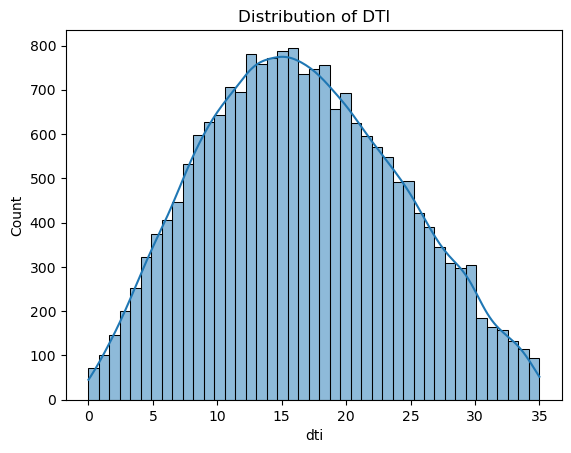

In [7]:

# Histogram to check the distribution of 'dti'
sns.histplot(df['dti'], kde=True)
plt.title('Distribution of DTI')
plt.show()


In [8]:
# Fill missing values in 'dti' with a specific value (e.g., 0)

df.loc[:, 'dti'] = df['dti'].fillna(0)


In [9]:
# Drop the 'last_major_derog_none' column
df.drop('last_major_derog_none', axis=1, inplace=True)


In [10]:
df.isnull().sum().count

<bound method Series.count of id                  0
grade               0
annual_inc          0
short_emp           0
emp_length_num      0
home_ownership      0
dti                 0
purpose             0
term                0
last_delinq_none    0
revol_util          0
od_ratio            0
bad_loan            0
dtype: int64>

In [11]:
# Label encoding the 'grade' column
df['grade'] = df['grade'].map({
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
})


In [12]:
# One-hot encoding the 'home_ownership' column
df = pd.get_dummies(df, columns=['home_ownership', 'purpose', 'term'], drop_first=True)


In [13]:
print(df)

             id  grade  annual_inc  short_emp  emp_length_num    dti  \
0      11454641      1      100000          1               1  26.27   
1       9604874      1       83000          0               4   5.39   
2       9684700      4       78000          0              11  18.45   
3       9695736      4       37536          0               6  12.28   
4       9795013      4       65000          0              11  11.26   
...         ...    ...         ...        ...             ...    ...   
19995   6595657      2       27000          0               9  18.36   
19996   1576331      2       45000          0               2  23.22   
19997   6645736      2      104000          0               5  13.27   
19998   6625736      1       38400          0               2  12.84   
19999   6625685      2      150000          0              11   2.20   

       last_delinq_none  revol_util  od_ratio  bad_loan  ...  purpose_house  \
0                     1        43.2  0.160624         0 

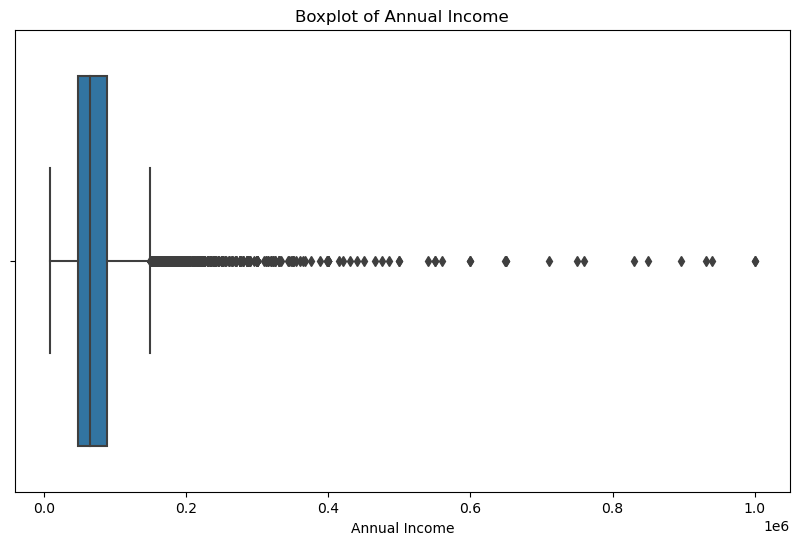

In [14]:
# Create a boxplot for the 'annual_inc' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['annual_inc'])
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()



In [15]:
# Using IQR method to remove outliers
df_cleaned = df[~((df['annual_inc'] < 0.0) | (df['annual_inc'] > 0.4))]


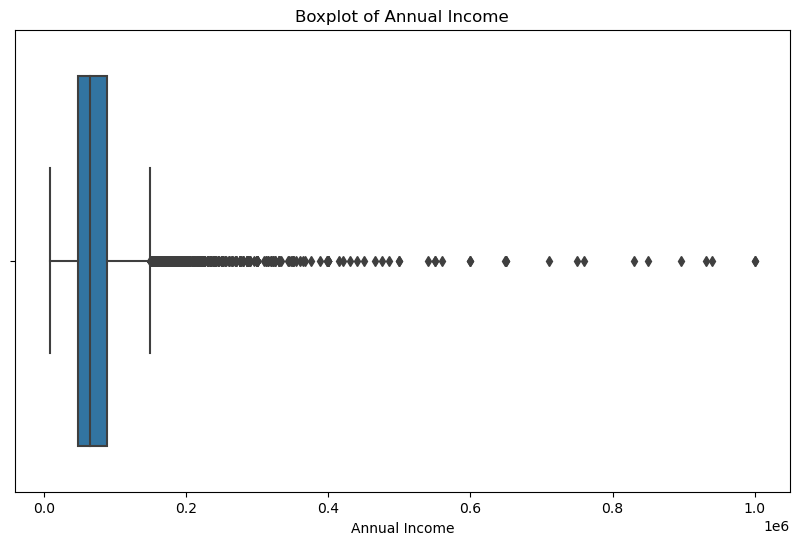

In [16]:
# Create a boxplot for the 'annual_inc' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['annual_inc'])
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('bad_loan', axis=1)  # Features
y = df['bad_loan']                # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Dropping less important features
df = df.drop(columns=['purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving'])

# Display the updated DataFrame
print(df.head())


         id  grade  annual_inc  short_emp  emp_length_num    dti  \
0  11454641      1      100000          1               1  26.27   
1   9604874      1       83000          0               4   5.39   
2   9684700      4       78000          0              11  18.45   
3   9695736      4       37536          0               6  12.28   
4   9795013      4       65000          0              11  11.26   

   last_delinq_none  revol_util  od_ratio  bad_loan  ...  home_ownership_RENT  \
0                 1        43.2  0.160624         0  ...                    1   
1                 0        21.5  0.810777         0  ...                    0   
2                 1        46.3  0.035147         1  ...                    0   
3                 0        10.7  0.534887         1  ...                    0   
4                 0        15.2  0.166500         0  ...                    0   

   purpose_credit_card  purpose_debt_consolidation  purpose_home_improvement  \
0                    1  

In [19]:
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,od_ratio,bad_loan,...,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,11454641,1,100000,1,1,26.27,1,43.2,0.160624,0,...,1,1,0,0,0,0,0,0,1,0
1,9604874,1,83000,0,4,5.39,0,21.5,0.810777,0,...,0,1,0,0,0,0,0,0,1,0
2,9684700,4,78000,0,11,18.45,1,46.3,0.035147,1,...,0,0,1,0,0,0,0,0,0,1
3,9695736,4,37536,0,6,12.28,0,10.7,0.534887,1,...,0,0,0,0,0,0,0,0,0,1
4,9795013,4,65000,0,11,11.26,0,15.2,0.166500,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
#from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4820    0]
 [1180    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4820
           1       0.00      0.00      0.00      1180

    accuracy                           0.80      6000
   macro avg       0.40      0.50      0.45      6000
weighted avg       0.65      0.80      0.72      6000



c:\Users\HP\Documents\PythonTutorial\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Documents\PythonTutorial\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Documents\PythonTutorial\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model

confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Confusion Matrix:
 [[3818 1002]
 [ 831  349]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      4820
           1       0.26      0.30      0.28      1180

    accuracy                           0.69      6000
   macro avg       0.54      0.54      0.54      6000
weighted avg       0.71      0.69      0.70      6000



In [22]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Confusion Matrix:
 [[4737   83]
 [1116   64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      4820
           1       0.44      0.05      0.10      1180

    accuracy                           0.80      6000
   macro avg       0.62      0.52      0.49      6000
weighted avg       0.74      0.80      0.73      6000



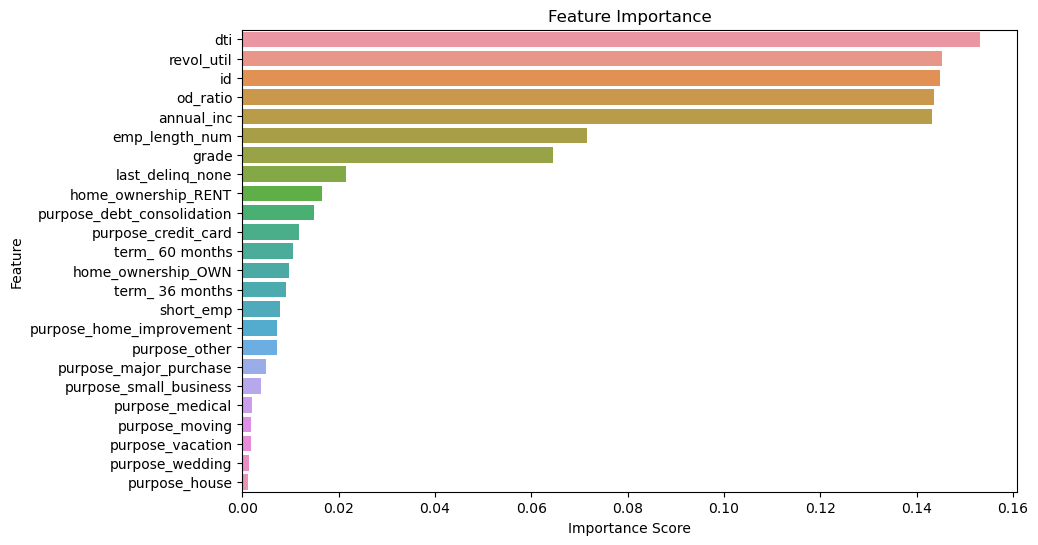

In [23]:
importance = random_forest_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [24]:
gbm_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model

confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Confusion Matrix:
 [[4763   57]
 [1121   59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      4820
           1       0.51      0.05      0.09      1180

    accuracy                           0.80      6000
   macro avg       0.66      0.52      0.49      6000
weighted avg       0.75      0.80      0.73      6000



In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Set up the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at each leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8046666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      4820
           1       0.62      0.02      0.03      1180

    accuracy                           0.80      6000
   macro avg       0.71      0.51      0.46      6000
weighted avg       0.77      0.80      0.72      6000



In [26]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(random_forest_model, X, y, cv=5)
print(cv_scores)
average_cv_score = np.mean(cv_scores)

# Print the average score
print(f"Average Cross-Validation Score: {average_cv_score:.4f}")

[0.796   0.79675 0.79525 0.79975 0.7905 ]
Average Cross-Validation Score: 0.7956


In [29]:
import pandas as pd

# Create a sample input that has all the required features
sample_input = pd.DataFrame({
    'annual_inc': [60000],          
    'short_emp': [0],               
    'emp_length_num': [5],          
    'dti': [15.0],                  
    'revol_util': [30.5],           
    'od_ratio': [0.5],              
    'home_ownership_OWN': [0],      
    'home_ownership_MORTGAGE': [1], 
    'home_ownership_RENT': [0],     
    'grade': [1],                   # Assuming 'grade' was label encoded
    'id': [123456],                 # Sample ID
    'last_delinq_none': [1],        # Example value from the training data
    'total_rec_late_fee': [0],      # Additional field based on your data
    'purpose_credit_card': [1],     # One-hot encoded purpose features
    'purpose_debt_consolidation': [0],
    'purpose_home_improvement': [0],
    'purpose_other': [0],
    'purpose_small_business': [0],
    'purpose_vacation': [0],
    'purpose_wedding': [0],
    'term_ 36 months': [1],         # One-hot encoded term feature
    'term_ 60 months': [0],         # Assuming binary encoding for terms
    # Add other fields you used in the model...
})

# Ensure all features used in training are present in sample_input
missing_cols = set(X_train.columns) - set(sample_input.columns)
for col in missing_cols:
    sample_input[col] = 0  # Fill missing columns with 0 or appropriate default values

# Reorder columns to match the training set order
sample_input = sample_input[X_train.columns]

# Step 2: Use the trained model to make predictions
prediction = random_forest_model.predict(sample_input)

# Step 3: Display the prediction result
print("Predicted bad loan status (0 = No, 1 = Yes):", prediction[0])


Predicted bad loan status (0 = No, 1 = Yes): 0


In [32]:
import pickle

# Assuming 'model' is your trained machine learning model
with open('loan_prediction_model.xgb', 'wb') as file:
    pickle.dump(random_forest_model, file)
